<a href="https://colab.research.google.com/github/maleehahassan/HIDA_Into_to_DL/blob/main/04_vgg_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview: CIFAR10 Classification with a Custom VGG-like Network

This notebook guides you through building a VGG-style convolutional neural network from scratch to classify images in the CIFAR10 dataset. The workflow includes:

- **Importing Libraries**: Key Python libraries for deep learning, data handling, and visualization.
- **Loading Data**: CIFAR10 dataset is loaded, containing 60,000 color images across 10 classes.
- **Preprocessing**: Images are normalized to the [0, 1] range for better model performance.
- **Visualization**: 25 sample images are displayed with their class names for a quick visual check.
- **Model Construction**: A VGG-like CNN is built from scratch using TensorFlow/Keras, with multiple convolutional and pooling layers, followed by dense layers.
- **Training**: The model is trained for 30 epochs on the CIFAR10 data.
- **Evaluation**: Training progress is visualized with accuracy and loss plots. The model is evaluated on the test set to report accuracy.
- **Confusion Matrix**: Predictions are made on the test set and a confusion matrix is plotted to show class-wise performance.

This notebook helps learners understand how to design, train, and evaluate deeper CNN architectures for image classification tasks.

In [1]:
# Import required libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize pixel values to [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
# Define class names for CIFAR10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

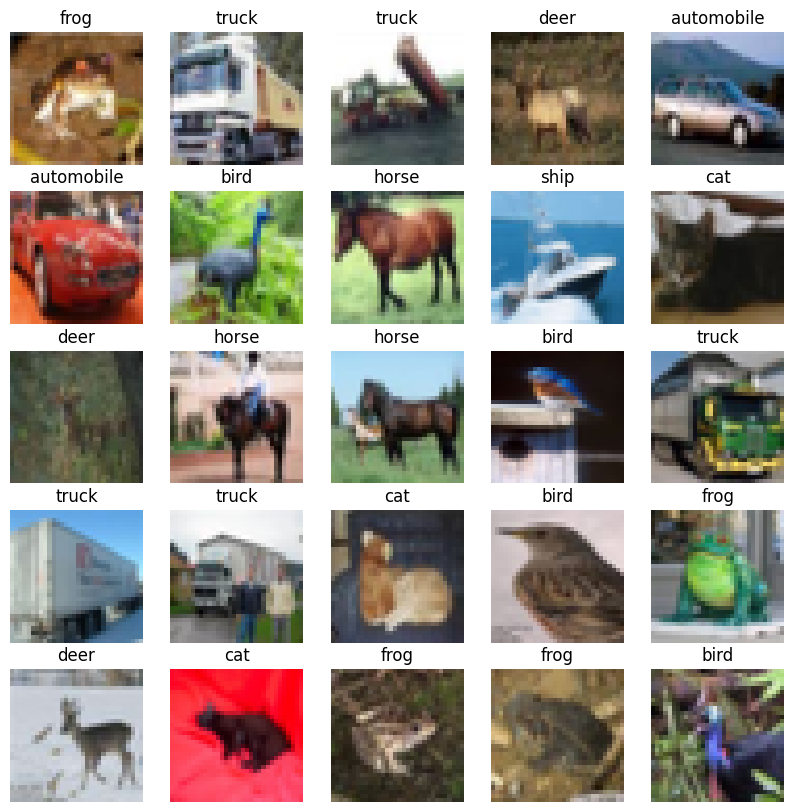

In [5]:
# Display 25 sample images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.axis('off')
    plt.title(class_names[train_labels[i,0]])
plt.show()

In [6]:
# Build a VGG-like model from scratch
# This is a simplified version for CIFAR10

def build_vgg_like(input_shape, num_classes):
    model = keras.Sequential()
    # Block 1
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape))
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    # Block 2
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    # Block 3
    model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    # Flatten and Dense layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(512, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))
    return model

In [7]:
# Create the VGG-like model
model = build_vgg_like(train_images.shape[1:], 10)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,248,202 (12.39 MB)

 Trainable params: 3,248,202 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=30,
                    batch_size=64,
                    validation_data=(test_images, test_labels),
                    verbose=2)

Epoch 1/30
782/782 - 24s - 31ms/step - accuracy: 0.3874 - loss: 1.6387 - val_accuracy: 0.5265 - val_loss: 1.3362
Epoch 2/30
782/782 - 12s - 15ms/step - accuracy: 0.6102 - loss: 1.0988 - val_accuracy: 0.6719 - val_loss: 0.9411
Epoch 3/30
782/782 - 12s - 15ms/step - accuracy: 0.7011 - loss: 0.8516 - val_accuracy: 0.7295 - val_loss: 0.7801
Epoch 4/30
782/782 - 12s - 15ms/step - accuracy: 0.7578 - loss: 0.6966 - val_accuracy: 0.7637 - val_loss: 0.6990
Epoch 5/30
782/782 - 12s - 15ms/step - accuracy: 0.7959 - loss: 0.5885 - val_accuracy: 0.7749 - val_loss: 0.6652
Epoch 6/30
782/782 - 12s - 15ms/step - accuracy: 0.8230 - loss: 0.5053 - val_accuracy: 0.7830 - val_loss: 0.6631
Epoch 7/30
782/782 - 12s - 15ms/step - accuracy: 0.8500 - loss: 0.4276 - val_accuracy: 0.7935 - val_loss: 0.6274
Epoch 8/30
782/782 - 12s - 15ms/step - accuracy: 0.8718 - loss: 0.3660 - val_accuracy: 0.7843 - val_loss: 0.6987
Epoch 9/30
782/782 - 12s - 15ms/step - accuracy: 0.8881 - loss: 0.3140 - val_accuracy: 0.7934 - 

In [10]:
# Convert training history to DataFrame
history_df = pd.DataFrame(history.history)

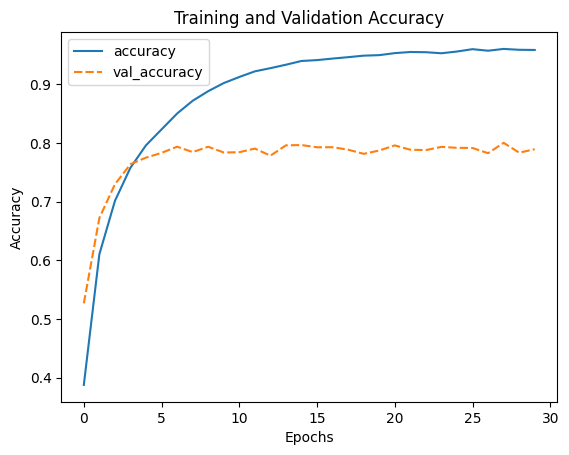

In [11]:
# Plot training and validation accuracy
sns.lineplot(data=history_df[['accuracy','val_accuracy']])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

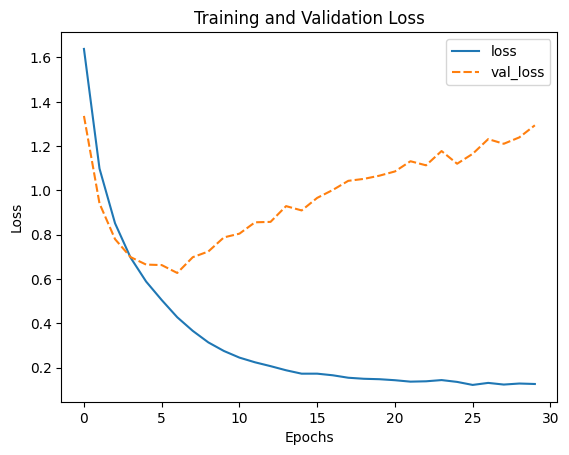

In [12]:
# Plot training and validation loss
sns.lineplot(data=history_df[['loss','val_loss']])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.3f}')

313/313 - 2s - 7ms/step - accuracy: 0.7892 - loss: 1.2940
Test accuracy: 0.789


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


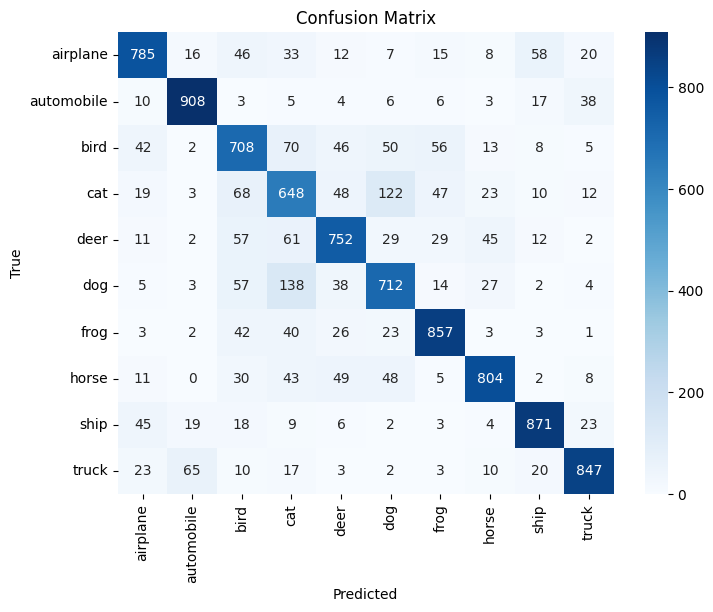

In [14]:
# Predict and show confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
pred_labels = np.argmax(model.predict(test_images), axis=1)
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
